# Importing Fucntions & Downloading Data for Terra Luna1-GBP

In [1]:
import yfinance as yahfin    #Importing Functions for calculations, data and functions. 
import numpy as nump
import pandas as pd
import os                    #For Figures

In [2]:
data = yahfin.download("LUNA1-GBP", start="2021-03-01", end="2022-03-01") #Downloading Data for CryptoCurrency Terra(Luna1-GBP)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head() #The Start date of the data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,3.836822,4.860846,3.829438,4.846777,4.846777,204089305
2021-03-02,4.846553,4.868088,4.462817,4.627384,4.627384,133369559
2021-03-03,4.638005,5.874887,4.615038,5.189740,5.189740,330296320
2021-03-04,5.181937,5.827079,5.103806,5.397028,5.397028,301530568
2021-03-05,5.380103,6.331408,5.036124,6.135539,6.135539,390172587


In [4]:
data.tail() #The End date of the data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-25,48.888287,54.665489,47.879196,54.575977,54.575977,3101446180
2022-02-26,54.568047,59.300034,54.016869,58.235661,58.235661,2356264926
2022-02-27,58.218475,58.774982,53.522308,54.323517,54.323517,2324835944
2022-02-28,54.289764,68.882950,52.782959,67.901985,67.901985,3730936476
2022-03-01,67.924896,70.495010,64.537682,67.140175,67.140175,3496180075


In [5]:
# Absolute changes are not optimal in statistics because they are dependent on the scale of the time series data itself.
#The following code derives the percentage changes or percentage returns in a financial context

In [6]:
data.describe().round(2) #Description of the Data with mean, standard deviation etc

,Open,High,Low,Close,Adj Close,Volume
count,366.00,366.00,366.00,366.00,366.00,3.660000e+02
mean,24.82,26.32,23.46,24.98,24.98,8.548393e+08
std,18.46,19.43,17.51,18.55,18.55,7.938418e+08
min,2.90,3.81,2.79,2.91,2.91,4.418110e+07
25%,9.73,10.62,9.17,9.88,9.88,2.759129e+08
50%,22.23,23.76,20.92,22.47,22.47,5.795786e+08
75%,37.42,39.21,35.84,37.53,37.53,1.202980e+09
max,74.28,77.10,71.69,74.40,74.40,4.597353e+09


In [7]:
data['Adj Close'].head() #Analysing the adjusted close for the year

Date
2021-03-01    4.846777
2021-03-02    4.627384
2021-03-03    5.189740
2021-03-04    5.397028
2021-03-05    6.135539
Name: Adj Close, dtype: float64

In [8]:
AdjustedCl =  data['Adj Close']
AdjustedCl.head()

Date
2021-03-01    4.846777
2021-03-02    4.627384
2021-03-03    5.189740
2021-03-04    5.397028
2021-03-05    6.135539
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

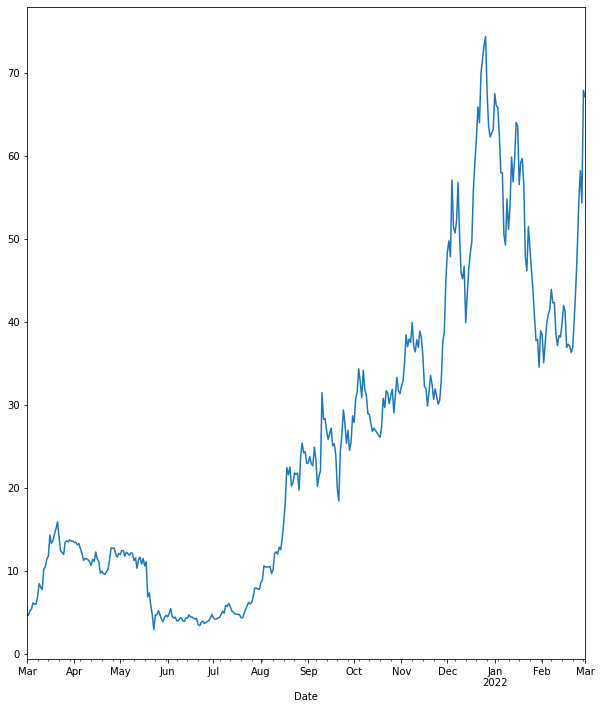

In [9]:
AdjustedCl.plot(figsize=(10, 12), subplots=True) #Depicting the Graph for Terra with Adjusted Closing Prices

In [10]:
data.pct_change().round(4).head() #Percentage Change in Terra 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02,0.2632,0.0015,0.1654,-0.0453,-0.0453,-0.3465
2021-03-03,-0.0430,0.2068,0.0341,0.1215,0.1215,1.4765
2021-03-04,0.1173,-0.0081,0.1059,0.0399,0.0399,-0.0871
2021-03-05,0.0382,0.0865,-0.0133,0.1368,0.1368,0.2940


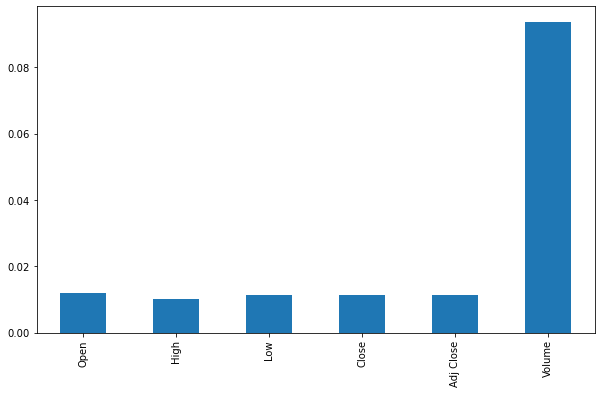

In [11]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [12]:
#As an alternative to percentage returns, log returns can be used. 
#In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [13]:
lgret = nump.log(data / data.shift(1))
lgret.head().round(4)                     #Calculating Log Returns for Terra 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02,0.2336,0.0015,0.1531,-0.0463,-0.0463,-0.4254
2021-03-03,-0.0440,0.1880,0.0335,0.1147,0.1147,0.9069
2021-03-04,0.1109,-0.0082,0.1007,0.0392,0.0392,-0.0911
2021-03-05,0.0375,0.0830,-0.0133,0.1282,0.1282,0.2577


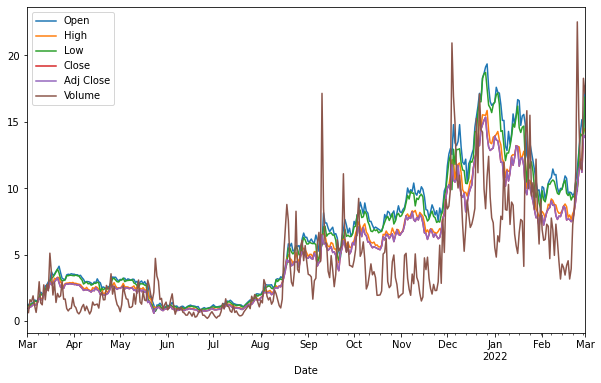

In [14]:
lgret.cumsum().apply(nump.exp).plot(figsize=(10, 6)); #Cummulative Sum Figure of TERRA GBP over the year 

In [15]:
lgret = nump.log(data['Adj Close'] / data['Adj Close'].shift(1)) #Calculating Volatility using Log Returns   

In [16]:
vol = nump.sqrt(366) * lgret.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 171.21 %


# Binomial Tree Method

# Finding Risk Neutral Probability 

In [17]:
St = 67.140175          # spot crypto price
K = 66                  # strike
T = 1/52                 # maturity 
r = 0.0134               # risk free rate - UK 2 year gilt yield - Bloomberg 31/03/2022  #https://www.bloomberg.com/markets/rates-bonds/government-bonds/uk
sig = 1.71              # diffusion coefficient or volatility
N = 2                   # number of periods or number of time steps  
payoff = "call"          # payoff 

In [18]:
delt = float(T) / N                             # Delta t
up = nump.exp(sig * nump.sqrt(delt))                 # up factor
dwn = 1.0 / up                                   # down factor 


In [19]:
S = nump.zeros((N + 1, N + 1))
S[0, 0] = St
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * up
        S[i+1, t] = S[i, t-1] * dwn
    z += 1

In [20]:
S

array([[67.140175  , 79.39710396, 93.89162477],
       [ 0.        , 56.77540961, 67.140175  ],
       [ 0.        ,  0.        , 48.010705  ]])

In [21]:
a = nump.exp(r * delt)    # risk free compound return
p = (a - dwn)/ (up - dwn)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4585605543443828

# OPTION PRICING 

# Monte Carlo Simulation Method

In [22]:
def mcs_simulation_nump(p):
    M = p
    I = p
    dt = T / M 
    S = nump.zeros((M + 1, I))
    S[0] = St 
    rn = nump.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * nump.exp((r - sigma ** 2 / 2) * dt + sigma * nump.sqrt(dt) * rn[t]) 
    return S

In [23]:
T = 1/52
r = 0.0134
sigma = 1.71
St = 67.140175
K = 66

In [24]:
S = mcs_simulation_nump(1000)

In [25]:
S = nump.transpose(S)
S

array([[67.140175  , 66.47378323, 65.97234469, ..., 53.97204563,
        53.38979595, 53.59375163],
       [67.140175  , 67.38404096, 67.67313507, ..., 68.26629166,
        68.12559214, 68.62207545],
       [67.140175  , 67.13422777, 65.14033566, ..., 53.57500719,
        53.42257542, 54.526771  ],
       ...,
       [67.140175  , 67.36188988, 67.53233468, ..., 80.22423808,
        80.18056266, 80.03781562],
       [67.140175  , 66.03956729, 65.76431073, ..., 96.0925452 ,
        97.62230156, 97.61112829],
       [67.140175  , 66.82361981, 66.92277202, ..., 67.04598796,
        67.6774493 , 68.93152557]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

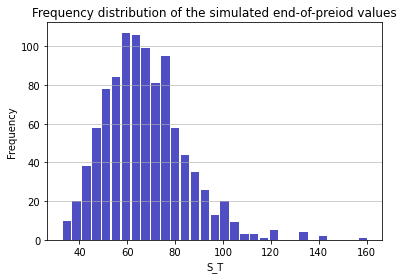

In [26]:
import matplotlib.pyplot as plot
n, bins, patches = plot.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plot.grid(axis='y', alpha=0.75)
plot.xlabel('S_T')
plot.ylabel('Frequency')
plot.title('Frequency distribution of the simulated end-of-preiod values')

In [27]:
cv = nump.mean(nump.maximum(S[:,-1] - K,0)) 
print('The value of the European call is', str(cv)) #Value of the Call Option

The value of the European call is 7.18443958157807


# Black-Scholes Model 

In [28]:
import scipy.stats as stat

In [29]:
def euro_option_bs(St, K, T, r, vol, payoff):
    
    #St: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call 
    
    d1 = (nump.log(St / K) + (r + 0.5 * vol ** 2) * T) / (vol * nump.sqrt(T))
    d2 = (nump.log(St / K) + (r - 0.5 * vol ** 2) * T) / (vol * nump.sqrt(T))
    if payoff == "call":
        option_value = St * stat.norm.cdf(d1, 0.0, 1.0) - K * nump.exp(-r * T) * stat.norm.cdf(d2, 0.0, 1.0)
   
    
    return option_value

In [30]:
euro_option_bs(67.140175, 66, 1/52, 0.0134, 1.71, 'call') #Value of the Call Option

6.8775839342785865

In [31]:
S = nump.linspace(20,100,11)
callp = nump.zeros((len(S),1))
for i in range(len(S)):
    callp[i] = euro_option_bs(S[i], 66, 1/52, 0.0134, 1.71, 'call')

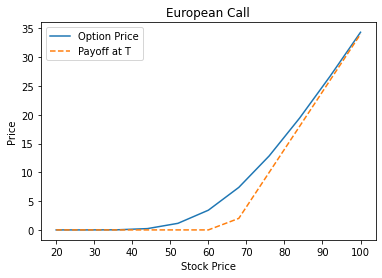

In [32]:
fig = plot.figure()
plot.plot(S, callp, '-')
plot.plot(S, nump.maximum(S-66,0), '--')
plot.xlabel('Stock Price')
plot.ylabel('Price')
plot.title('European Call')
plot.legend(['Option Price','Payoff at T'])

# Greeks

 Finding Option Value

In [34]:
def euro_option_bs(St, K, T, r, vol, payoff):
    
    #St: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call 
    
    d1 = (nump.log(St / K) + (r + 0.5 * vol ** 2) * T) / (vol * nump.sqrt(T))
    d2 = (nump.log(St / K) + (r - 0.5 * vol ** 2) * T) / (vol * nump.sqrt(T))
    if payoff == "call":
        option_value = St * stat.norm.cdf(d1, 0.0, 1.0) - K * nump.exp(-r * T) * stat.norm.cdf(d2, 0.0, 1.0)
   
    
    return option_value

In [35]:
euro_option_bs(67.140175, 66, 1/52, 0.0134, 1.71, 'call')

6.8775839342785865

# Delta

In [36]:
def delta(St, K, T, r, q, vol, payoff):
    
     #St: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield will be ZERO as cryptocurrency has no dividend
    #vol: volatility of underlying asset
    #payoff: call 
    
    d1 = (nump.log(St / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * nump.sqrt(T))
    if payoff == "call":
        delta = nump.exp(-q * T) * stat.norm.cdf(d1, 0.0, 1.0)
   # elif payoff == "put":
    #    delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [37]:
delta (67.140175, 66, 1/52, 0.0134, 0 , 1.71, 'call')

0.5760828204244137

Here, for every £1 increase in the underlying asset, there is an increase of £0.57 in the option price.

In [38]:
S = nump.linspace(20,100,11)
Delta_Call = nump.zeros((len(S),1))

for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 66, 1/52, 0.0134, 0, 1.71, 'call')
  

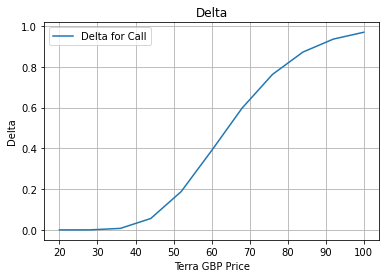

In [39]:
fig = plot.figure()
plot.plot(S, Delta_Call, '-')
plot.grid()
plot.xlabel('Terra GBP Price')
plot.ylabel('Delta')
plot.title('Delta')
plot.legend(['Delta for Call'])

Delta Call is from 0 to 1 the difference between a delta call and delta put is 1 and is called put call parity. 

In [40]:
S = nump.linspace(20, 100, 10)
T = nump.linspace(0.2, 2, 10)
Delta_Call = nump.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta_Call[i,j] = delta(S[j], 66, T[i], 0.0134, 0, 1.71, 'call')

C:\Users\sobar\AppData\Local\Temp/ipykernel_10424/1441161894.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca (projection='3d')


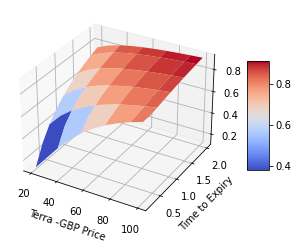

In [41]:
fig = plot.figure(figsize=(8, 4))
ax = fig.gca (projection='3d')
S, T = nump.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta_Call, rstride=2, cstride=2, cmap=plot.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Terra -GBP Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

In [42]:
def gamma(St, K, T, r, q, vol, payoff):
    
    d1 = (nump.log(St / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * nump.sqrt(T))
    gamma = nump.exp(- q * T) * stat.norm.pdf(d1, 0.0, 1.0) / (vol * St * nump.sqrt(T))
    
    return gamma

In [43]:
gamma (67.140175, 66, 1/52, 0.0134, 0 , 1.71, 'call')

0.0246001666522887

In [44]:
S = nump.linspace(20,100,11)
Gamma = nump.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],66, 1/52, 0.0134, 0, 1.71, 'call')

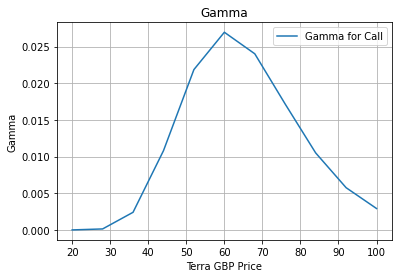

In [45]:
fig = plot.figure()
plot.plot(S, Gamma, '-')
plot.grid()
plot.xlabel('Terra GBP Price')
plot.ylabel('Gamma')
plot.title('Gamma')
plot.legend(['Gamma for Call'])

The gamma is the most sensitive near In the Money (ITM) Call options

In [47]:
S = nump.linspace(20, 100, 10)
T = nump.linspace(0.2, 2, 10)
Gamma = nump.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 66, T[i], 0.0134, 0, 1.71, 'call')

C:\Users\sobar\AppData\Local\Temp/ipykernel_10424/98934912.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


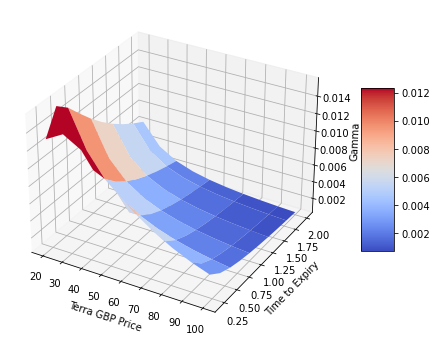

In [48]:
fig = plot.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = nump.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plot.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Terra GBP Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed

In [49]:
def speed(St, K, T, r, q, vol, payoff):
    
    d1 = (nump.log(St / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * nump.sqrt(T))
    speed = - nump.exp(-q * T) * stat.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (St**2) * nump.sqrt(T)) * (d1 + vol * nump.sqrt(T))
    
    return speed

In [50]:
speed(67.140175, 66, 1/52, 0.0134, 0 , 1.71, 'call')

-9.192500386564329e-05

If the underlying asset increases by £1 the speed decreases by – 9.1925 

In [51]:
S = nump.linspace(20,100,11)
Speed = nump.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i],66, 1/52, 0.0134, 0 , 1.71, 'call')

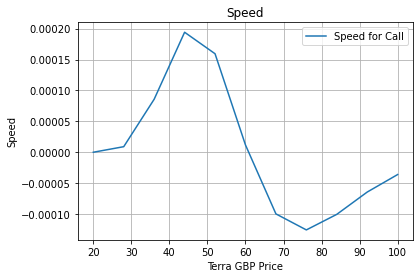

In [52]:
fig = plot.figure()
plot.plot(S, Speed, '-')
plot.grid()
plot.xlabel('Terra GBP Price')
plot.ylabel('Speed')
plot.title('Speed')
plot.legend(['Speed for Call'])

If gamma is large, the speed moves fast. 

In [53]:
S = nump.linspace(20, 100, 10)
T = nump.linspace(0.2, 2, 10)
Speed = nump.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 66, T[i], 0.0134, 0, 1.71, 'call')

C:\Users\sobar\AppData\Local\Temp/ipykernel_10424/1503636885.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


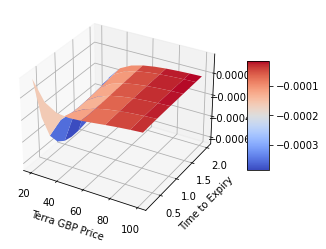

In [54]:
fig = plot.figure(figsize=(8, 4))
ax = fig.gca(projection='3d')
S, T = nump.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plot.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Terra GBP Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

In [55]:
def theta(St, K, T, r, q, vol, payoff):
    
    d1 = (nump.log(St / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * nump.sqrt(T))
    d2 = (nump.log(St / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * nump.sqrt(T))
    if payoff == "call":
        theta = vol * St * nump.exp(-q * T) * stat.norm.pdf(d1, 0.0, 1.0) / (2 * nump.sqrt(T)) - q * St * nump.exp(-q * T) * stat.norm.cdf(d1, 0.0, 1.0) + r * K * nump.exp(-r * T) * stat.norm.cdf(d2, 0.0, 1.0)
   
    return theta

In [56]:
theta (67.140175, 66, 1/52, 0.0134, 0 , 1.71, 'call')

162.5568125729713

The longer the time to expiry. greater the uncertainty and more expensive the option and vice versa. 

In [57]:
T = nump.linspace(1,10,12)
Theta_Call = nump.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(67.140175, 66, T[i], 0.0134, 0, 1.71, 'call')
    

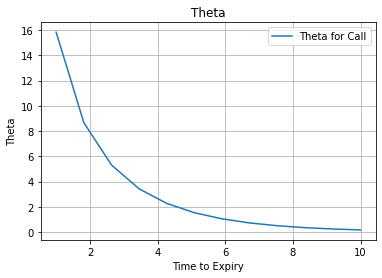

In [58]:
fig = plot.figure()
plot.plot(T, Theta_Call, '-')
plot.grid()
plot.xlabel('Time to Expiry')
plot.ylabel('Theta')
plot.title('Theta')
plot.legend(['Theta for Call'])

In [59]:
S = nump.linspace(20, 100, 10)
T = nump.linspace(0.1, 2, 10)
Theta = nump.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 66, T[i], 0.0134, 0, 1.71, 'call')

C:\Users\sobar\AppData\Local\Temp/ipykernel_10424/157709334.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


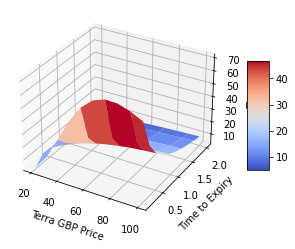

In [60]:
fig = plot.figure(figsize=(8, 4))
ax = fig.gca(projection='3d')
S, T = nump.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plot.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Terra GBP Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

In [61]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (nump.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * nump.sqrt(T))
    d2 = (nump.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * nump.sqrt(T))
    if payoff == "call":
        rho =  K * T * nump.exp(-r * T) * stat.norm.cdf(d2, 0.0, 1.0)
    
    
    return rho

In [62]:
rho (67.140175, 66, 1/52, 0.0134, 0 , 1.71, 'call')

0.611552258529041

The amount change multiplied by £0.611 of every £1, resulting the call value will be positive and move.

In [63]:
r = nump.linspace(0.8,2.5,11)
Rho_Call = nump.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(67.140175, 66, 1/52, r[i], 0, 1.71, 'call')

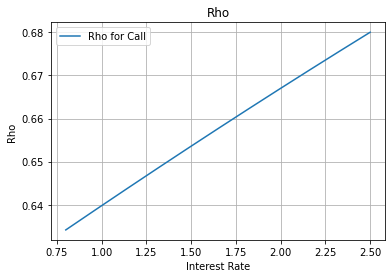

In [64]:
fig = plot.figure()
plot.plot(r, Rho_Call, '-')
plot.grid()
plot.xlabel('Interest Rate')
plot.ylabel('Rho')
plot.title('Rho')
plot.legend(['Rho for Call'])

In [65]:
S = nump.linspace(20, 100, 10)
T = nump.linspace(0.2, 2, 10)
Rho = nump.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 66, T[i], 0.0134, 0, 1.7, 'call')

C:\Users\sobar\AppData\Local\Temp/ipykernel_10424/1917467829.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


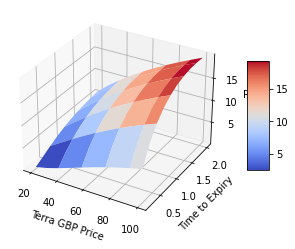

In [66]:
fig = plot.figure(figsize=(8, 4))
ax = fig.gca(projection='3d')
S, T = nump.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plot.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Terra GBP Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega

In [67]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (nump.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * nump.sqrt(T))
    vega = S * nump.sqrt(T) * nump.exp(-q * T) * stat.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [68]:
vega (67.140175, 66, 1/52, 0.0134, 0 , 1.71, 'call')

3.6466640341706773

The option value will increase £0.364 with every 1 percent increase in volatility.

In [69]:
vol = nump.linspace(0.1,0.5,11)
Vega = nump.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(67.140175, 66, 1/52, 0.0134, 0, vol[i], 'call')

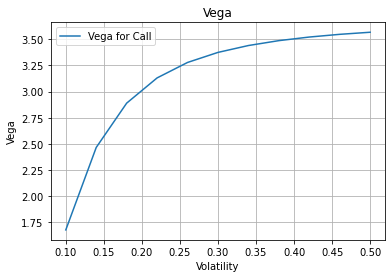

In [70]:
fig = plot.figure()
plot.plot(vol, Vega, '-')
plot.grid()
plot.xlabel('Volatility')
plot.ylabel('Vega')
plot.title('Vega')
plot.legend(['Vega for Call'])

In [71]:
S = nump.linspace(20, 100, 10)
T = nump.linspace(0.2, 2, 10)
Vega = nump.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 66, T[i], 0.0134, 0, 1.7, 'call')

C:\Users\sobar\AppData\Local\Temp/ipykernel_10424/2089062012.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


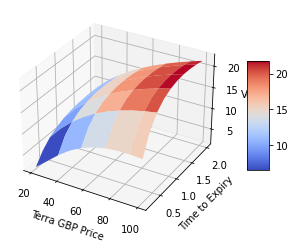

In [72]:
fig = plot.figure(figsize=(8, 4))
ax = fig.gca(projection='3d')
S, T = nump.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plot.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Terra GBP Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);